In [1]:
from finance_model.chart_of_accounts import ChartOfAccounts, unpickle_accounts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
accounts = unpickle_accounts()
# accounts = ChartOfAccounts()

Total duration for function <unpickle_accounts> is 0.0014958000101614743


In [17]:
accounts.account_mapping.columns.to_list()

['low', 'high', 'bs_is', 'category', 'sub_category', 'sub_account']

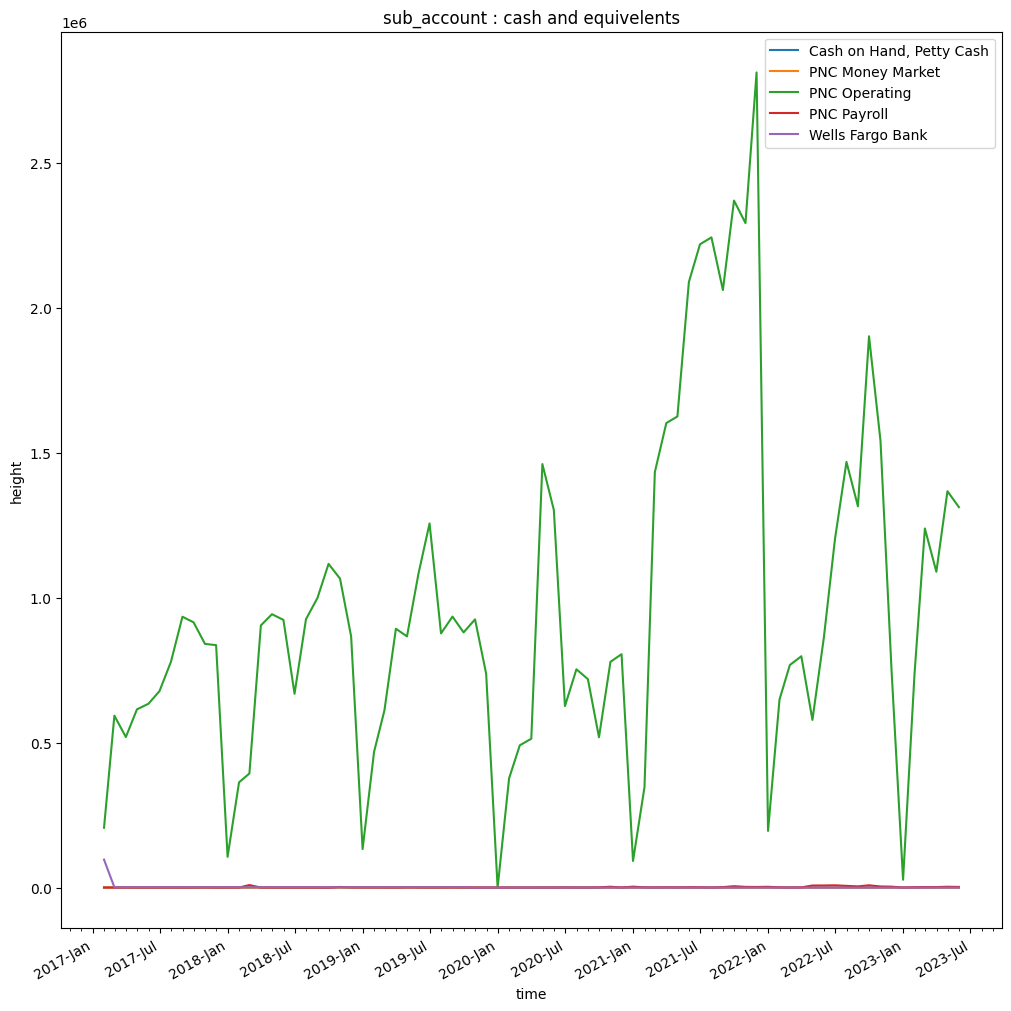

In [13]:
accounts.get_data_to_plot('sub_account', 'cash and equivelents', 'account')

In [10]:
dam = accounts.detailed_account_mapping
tb = accounts.trial_balances.T
tb['account_no'] = tb.index
tb = tb.merge(dam, how='left', on='account_no')

level = 'sub_account'
filter_value = 'cash and equivelents'
group_by = 'account'

rows = tb[level] == filter_value

tb = tb[rows]
group = tb.groupby(group_by)
tb[group_by].nunique()
group.size()
df = group.sum().iloc[:,:-5].T

In [12]:
df

account,"Cash on Hand, Petty Cash",PNC Money Market,PNC Operating,PNC Payroll,Wells Fargo Bank
2017-01-31,100.0,0.0,206481.42,359.08,96544.28
2017-02-28,100.0,0.0,593226.37,186.51,1235.53
2017-03-31,100.0,0.0,519427.85,283.56,1235.53
2017-04-30,100.0,0.0,614920.67,88.73,1235.53
2017-05-31,100.0,0.0,634201.97,110.36,1235.53
...,...,...,...,...,...
2023-01-31,100.0,0.0,737289.83,1207.69,0.00
2023-02-28,100.0,0.0,1238993.67,1817.49,0.00
2023-03-31,100.0,0.0,1089580.81,1833.92,0.00
2023-04-30,100.0,0.0,1367670.96,2953.41,0.00


In [ ]:
len(tb.columns)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.dates as mdates
import base64
from io import BytesIO

def plot(df, binary=False):
    figsize = (10, 10)
    if binary:
        fig = Figure(figsize=figsize)
        ax = fig.subplots()
    else:
        fig, ax = plt.subplots(figsize=figsize, layout='constrained')

    date_axis = [np.datetime64(dt) for dt in df.index]
    for i in df.columns:
        ax.plot(date_axis, df[i],
                label=i)
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    ax.set_xlabel("time")
    ax.set_ylabel("height")
    ax.set_title("Fancy Title")
    ax.legend()

    if binary:
        # Save it to a temporary buffer.
        buf = BytesIO()
        fig.savefig(buf, format="png")
        # Embed the result in the html output.
        data = base64.b64encode(buf.getbuffer()).decode("ascii")
        return data
    else:
        plt.show()

In [ ]:
for i in df.columns:
    print(f'i={i}')
    print(df[i])
    print(f'col={df.columns[i]}')

In [ ]:
plot(df)

In [ ]:
accounts.detailed_account_mapping

In [ ]:
accounts.account_mapping